In [ ]:
import pandas as pd
# from geopy.geocoders import Nominatim
# import time
# from sklearn.cluster import DBSCAN
import numpy as np
# from geopy.distance import geodesic
import matplotlib.pyplot as plt
# import folium
from sklearn.cluster import KMeans

In [26]:
df = pd.read_parquet(r"E:\Hydroneo\Analytics\disease\data\cleaned_data_removed_ZERO.parquet", engine="pyarrow")

print(df.head())

                         id   latitude   longitude
0  66fd107a636caa2b6a7218b8  16.335354  102.254739
1  6707853b97fb7a0c60569ad7  13.706300  100.459700
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700
3  670e182e97fb7a0c60b38670  13.753165  100.494722
4  670e191297fb7a0c60b392a1  13.706300  100.459700


In [27]:
coords = df[['latitude', 'longitude']].to_numpy()

# Choose number of clusters (e.g., 3)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

# Inspect results
print(df.head())

                         id   latitude   longitude  cluster
0  66fd107a636caa2b6a7218b8  16.335354  102.254739        2
1  6707853b97fb7a0c60569ad7  13.706300  100.459700        0
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700        0
3  670e182e97fb7a0c60b38670  13.753165  100.494722        0
4  670e191297fb7a0c60b392a1  13.706300  100.459700        0


In [28]:
print("Cluster centers (lat, lon):")
print(kmeans.cluster_centers_)

Cluster centers (lat, lon):
[[ 13.61452149 100.22537896]
 [  6.8893645  100.02277898]
 [ 16.33535391 102.25473855]
 [ 13.4494979  101.19117535]]


In [29]:
print(df['cluster'].nunique())   # number of unique clusters
print(df['cluster'].unique())    # which cluster IDs

4
[2 0 1 3]


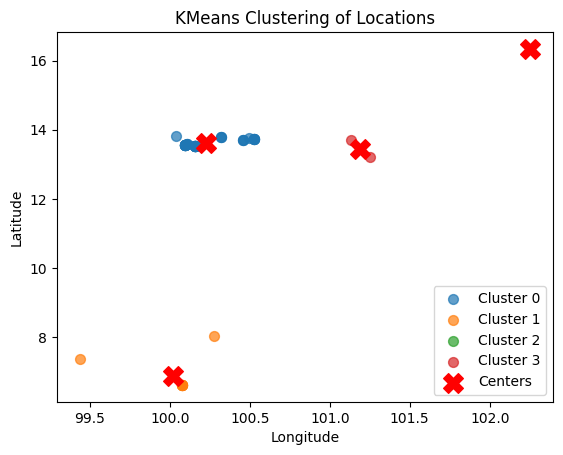

In [30]:
for cluster_id in sorted(df['cluster'].unique()):
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_points['longitude'], 
        cluster_points['latitude'], 
        s=50, alpha=0.7,
        label=f"Cluster {cluster_id}"
    )

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:,1], 
    kmeans.cluster_centers_[:,0], 
    c='red', marker='X', s=200, label='Centers'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Locations")
plt.legend()
plt.show()

In [31]:
# Example new coordinate
new_lat, new_lon = 13.556924, 100.0950911

# Make sure it’s in the same format as training data [[lat, lon]]
new_point = np.array([[new_lat, new_lon]])

# Predict cluster
cluster_id = kmeans.predict(new_point)[0]
print(f"New point ({new_lat}, {new_lon}) belongs to cluster {cluster_id}")

New point (13.556924, 100.0950911) belongs to cluster 0


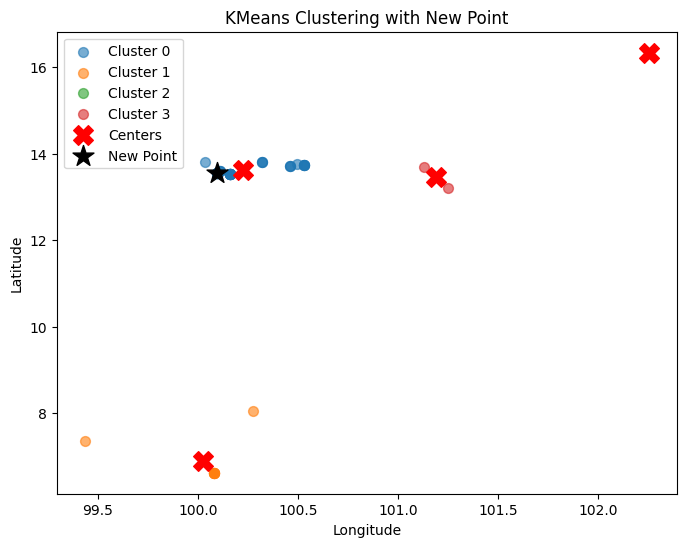

In [32]:
plt.figure(figsize=(8,6))

# Plot existing clusters
for cluster_id in sorted(df['cluster'].unique()):
    cluster_points = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_points['longitude'], cluster_points['latitude'], 
                s=50, alpha=0.6, label=f"Cluster {cluster_id}")

# Plot centers
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            c='red', marker='X', s=200, label='Centers')

# Plot new point
plt.scatter(new_lon, new_lat, c='black', marker='*', s=250, label='New Point')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering with New Point")
plt.legend()
plt.show()
